## Loading the data

In [7]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sb
sb.set_style('whitegrid')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# LOAD TRAIN DATA
data = pd.read_csv('data_train.csv',index_col='Time', parse_dates=True) #Parsing strings to datetime format

# LOAD TEST DATA
data_test = pd.read_csv('data_test.csv',index_col='Time', parse_dates=True)

## Checking the Data

In [3]:
# CHECK DATAFRAME
data.head()

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-09-15 00:00:00,5488.175540,11.737357,7.843532,1030.590108,2935.660276,38.641018
2015-09-15 00:01:00,5423.930126,11.543755,7.681607,1039.869847,2928.333772,45.243656
2015-09-15 00:02:00,5502.058523,11.169525,7.514173,1033.237205,2919.128115,38.716221
2015-09-15 00:03:00,5477.862749,11.035091,7.592248,1035.075573,2985.500811,42.860703
2015-09-15 00:04:00,5508.013201,11.418827,7.784895,1042.189406,2905.052105,50.524544


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 138241 entries, 2015-09-15 00:00:00 to 2015-12-20 00:00:00
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Bearing Pressure (kPa)         138240 non-null  float64
 1   Power Draw (MW)                138240 non-null  float64
 2   Speed (RPM)                    138241 non-null  float64
 3   Dilution Flow Rate (m3/h)      138239 non-null  float64
 4   Conveyor Belt Feed Rate (t/h)  138239 non-null  float64
 5   Conveyor Belt PSD Fines (%)    138239 non-null  float64
dtypes: float64(6)
memory usage: 7.4 MB
None


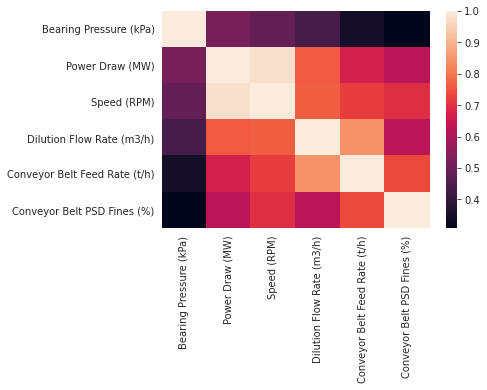

In [ ]:
# VISUALIZE LEVEL OF CORRELATION BETWEEN VARIABLES

sb.heatmap(data.corr())

<function matplotlib.pyplot.grid>

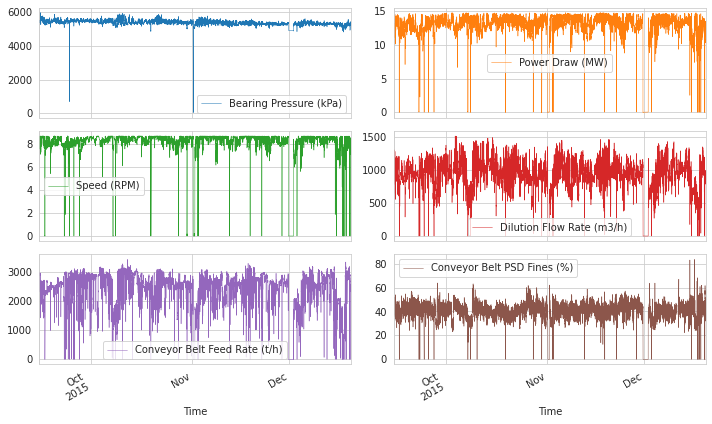

In [ ]:
# PLOTTING THE TRAIN DATA TIME SERIES

P=data.resample("5Min").median().plot(subplots=True, layout=(-1, 2), lw=0.5, figsize=(10, 6))
plt.tight_layout()
plt.grid

In [ ]:
# CHECK FOR NULL VALUES
data.isnull().sum()

Bearing Pressure (kPa)           1
Power Draw (MW)                  1
Speed (RPM)                      0
Dilution Flow Rate (m3/h)        2
Conveyor Belt Feed Rate (t/h)    2
Conveyor Belt PSD Fines (%)      2
dtype: int64

In [ ]:
# SHOW ALL NULL VALUES IN THE DATAFRAME

dataNull=data[data['Dilution Flow Rate (m3/h)'].isnull() | data['Power Draw (MW)'].isnull()]
dataNull

,Bearing Pressure (kPa),Power Draw (MW),Speed (RPM),Dilution Flow Rate (m3/h),Conveyor Belt Feed Rate (t/h),Conveyor Belt PSD Fines (%)
Time,,,,,,
2015-09-25 16:15:00,NaN,NaN,0.000000,0.0,0.0,0.0
2015-09-26 19:37:00,5543.628732,13.707226,8.408340,NaN,NaN,NaN
2015-11-02 20:25:00,5226.401111,10.052786,6.977018,NaN,NaN,NaN


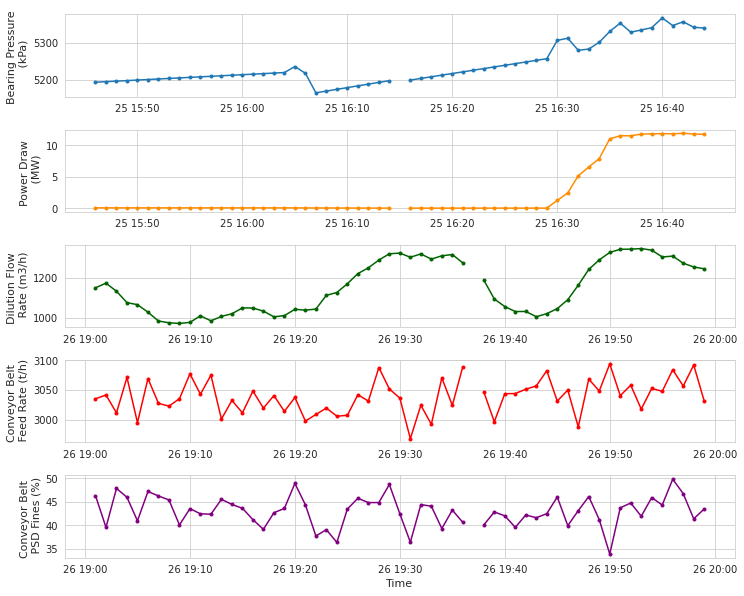

In [ ]:
# VISUALIZE THE REGIONS OF DATA WHERE THE NULL VALUES ARE, IN EACH COLUMN

dataNull1 = data[(data.index>'2015-09-25 15:45:00')&(data.index<'2015-09-25 16:45:00')]
dataNull2 = data[(data.index>'2015-09-26 19:00:00')&(data.index<'2015-09-26 20:00:00')]

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (12,10))
plt.subplots_adjust(hspace=0.4)
ax1.plot(dataNull1.index,dataNull1['Bearing Pressure (kPa)'], marker='.')
ax1.set_ylabel('Bearing Pressure \n (kPa)',fontsize=11)
ax2.plot(dataNull1.index,dataNull1['Power Draw (MW)'], marker='.', c='darkorange')
ax2.set_ylabel('Power Draw \n (MW)',fontsize=11)
ax3.plot(dataNull2.index,dataNull2['Dilution Flow Rate (m3/h)'], marker='.', c='darkgreen')
ax3.set_ylabel('Dilution Flow \n Rate (m3/h)',fontsize=11)
ax4.plot(dataNull2.index,dataNull2['Conveyor Belt Feed Rate (t/h)'], marker='.', c='red')
ax4.set_ylabel('Conveyor Belt \n Feed Rate (t/h)',fontsize=11)
ax5.plot(dataNull2.index,dataNull2['Conveyor Belt PSD Fines (%)'], marker='.', c='purple')
ax5.set_ylabel('Conveyor Belt \n PSD Fines (%)',fontsize=11)
ax5.set_xlabel('Time',fontsize=11);

In [ ]:
# FIND THE MEAN OF THE 10 VALUES AROUND THE NULL ONES, IN EACH COLUMN

data1 = data[(data.index>'2015-09-25 16:10:00')&(data.index<'2015-09-25 16:20:00')]
data2 = data[(data.index>'2015-09-26 19:32:00')&(data.index<'2015-09-26 19:42:00')]
print('Bearing Pressure mean: ', data1['Bearing Pressure (kPa)'].mean())
print('Power Draw mean:', data1['Power Draw (MW)'].mean())
print('Dilution Flow Rate mean:', data2['Dilution Flow Rate (m3/h)'].mean())
print('Conveyor Belt Feed Rate', data2['Conveyor Belt Feed Rate (t/h)'].mean())
print('Conveyor Belt PSD Fines mean:', data2['Conveyor Belt PSD Fines (%)'].mean())

Bearing Pressure mean:  5198.788268225685
Power Draw mean: 0.0038562166216432035
Dilution Flow Rate mean: 1194.3424593899952
Conveyor Belt Feed Rate 3038.4333433932843
Conveyor Belt PSD Fines mean: 41.46007728625


In [ ]:
# REPLACE THE NULL VALUES WITH THE MEAN VALUES AS FOUND ABOVE
dataNew = data.replace({'Bearing Pressure (kPa)':{NaN: data1['Bearing Pressure (kPa)'].mean()},
                        'Power Draw (MW)': {NaN: data1['Power Draw (MW)'].mean()},
                        'Dilution Flow Rate (m3/h)': {NaN: data2['Dilution Flow Rate (m3/h)'].mean()},
                        'Conveyor Belt Feed Rate (t/h)': {NaN: data2['Conveyor Belt Feed Rate (t/h)'].mean()},
                        'Conveyor Belt PSD Fines (%)': {NaN: data2['Conveyor Belt PSD Fines (%)'].mean()}})

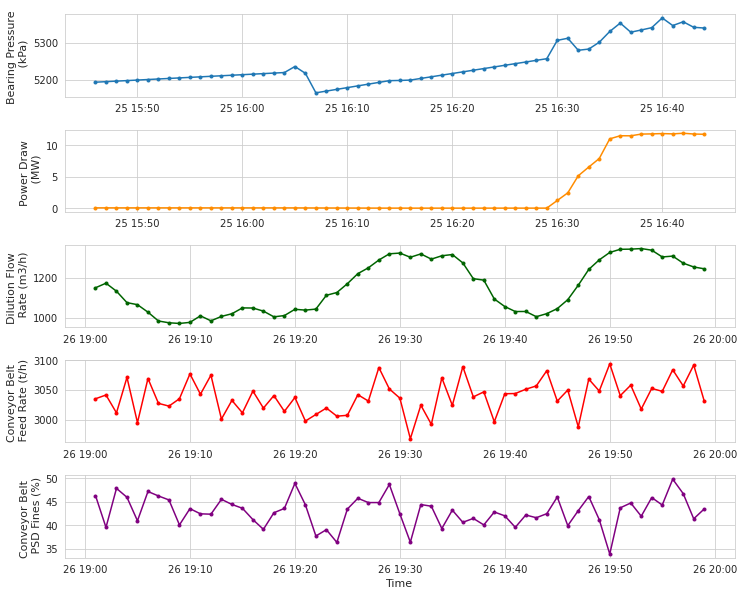

In [ ]:
# VISUALIZE AGAIN THE REGION AFTER THE REPLACEMENTS
dataNew1 = dataNew[(dataNew.index>'2015-09-25 15:45:00')&(dataNew.index<'2015-09-25 16:45:00')]
dataNew2 = dataNew[(dataNew.index>'2015-09-26 19:00:00')&(dataNew.index<'2015-09-26 20:00:00')]

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize = (12,10))
plt.subplots_adjust(hspace=0.4)
ax1.plot(dataNew1.index,dataNew1['Bearing Pressure (kPa)'], marker='.')
ax1.set_ylabel('Bearing Pressure \n (kPa)',fontsize=11)
ax2.plot(dataNew1.index,dataNew1['Power Draw (MW)'], marker='.', c='darkorange')
ax2.set_ylabel('Power Draw \n (MW)',fontsize=11)
ax3.plot(dataNew2.index,dataNew2['Dilution Flow Rate (m3/h)'], marker='.', c='darkgreen')
ax3.set_ylabel('Dilution Flow \n Rate (m3/h)',fontsize=11)
ax4.plot(dataNew2.index,dataNew2['Conveyor Belt Feed Rate (t/h)'], marker='.', c='red')
ax4.set_ylabel('Conveyor Belt \n Feed Rate (t/h)',fontsize=11)
ax5.plot(dataNew2.index,dataNew2['Conveyor Belt PSD Fines (%)'], marker='.', c='purple')
ax5.set_ylabel('Conveyor Belt \n PSD Fines (%)',fontsize=11)
ax5.set_xlabel('Time',fontsize=11);

## Preparing the Data

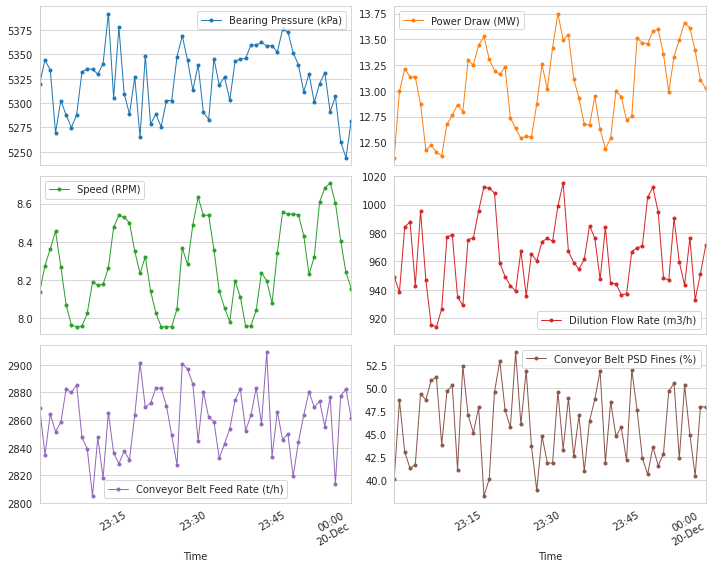

In [ ]:
# SELECT THE LAST 60 MIN OF THE TRAIN DATA

UseData=dataNew.tail(60)
UseData.plot(subplots=True, layout=(-1, 2), lw=1, figsize=(10, 8),marker='.')
plt.tight_layout()


## Check stationarity of the variables

In [ ]:
# CHECH WITH DICKEY-FULLER TEST AND LOOK AT THE P-VALUE. IF P-VALUE > 0.05 THE SERIES IS NOT STATIONARY 

from statsmodels.tsa.stattools import adfuller

for i in range(len(UseData.columns)):
  result = adfuller(UseData[UseData.columns[i]])
  if result[1]>0.05:
    print('{} - Series is not Stationary'.format(UseData.columns[i]))
  else:
    print('{} - Series is Stationary'.format(UseData.columns[i]))

Bearing Pressure (kPa) - Series is not Stationary
Power Draw (MW) - Series is Stationary
Speed (RPM) - Series is Stationary
Dilution Flow Rate (m3/h) - Series is Stationary
Conveyor Belt Feed Rate (t/h) - Series is Stationary
Conveyor Belt PSD Fines (%) - Series is Stationary


### Deeper stationarity check for the first 2 variables

In [ ]:
dataBP = UseData['Bearing Pressure (kPa)']
dataPD = UseData['Power Draw (MW)']

# CHECH WITH FULL DICKEY-FULLER TEST
#Test statistics should be < then the critical values at the difference confidence levels

from statsmodels.tsa.stattools import adfuller

resultBP = adfuller(dataBP, autolag='AIC') #with AIC the algorithm automatically finds the optimal number of lags
resultPD = adfuller(dataPD, autolag='AIC')
OutBP = pd.Series(resultBP[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
OutPD = pd.Series(resultPD[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key1, value1 in resultBP[4].items():
   OutBP['Critical Value (%s)'%key1] = value1
for key2, value2 in resultPD[4].items():   
   OutPD['Critical Value (%s)'%key2] = value2

print('BEARING PRESSURE(kPa): \n', OutBP)
print('\n POWER DRAW (MW): \n',OutPD)
    

BEARING PRESSURE(kPa): 
 Test Statistic                 -2.375914
p-value                         0.148650
#Lags Used                      1.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64

 POWER DRAW (MW): 
 Test Statistic                 -3.050244
p-value                         0.030461
#Lags Used                      0.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


Text(0.5, 0, 'Time')

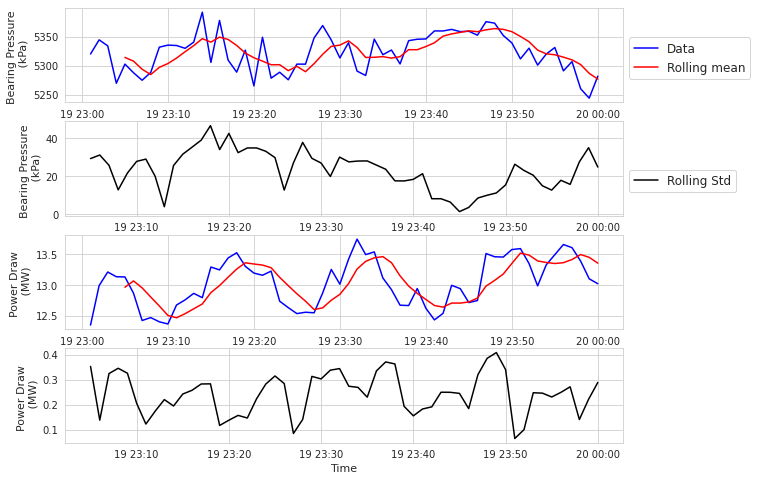

In [ ]:
# THE P-VALUES IN THE RESULTS ABOVE TELL US THE BEARING PRESSURE TIME SERIES IS NOT STATIONARY (p-value > 0.05)
# PLOT THE ROLLING STATISTICS TO VISUALIZE THE STATIONARITY

rolmeanBP = dataBP.rolling(window=5).mean()
rolstdBP = dataBP.rolling(window=5).std()
rolmeanPD = dataPD.rolling(window=5).mean()
rolstdPD = dataPD.rolling(window=5).std()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(10,8))
plt.subplots_adjust(wspace=0.8)
ax1.plot(dataBP, c='blue',label='Data')
ax1.plot(rolmeanBP, c='red', label='Rolling mean')
ax1.set_ylabel('Bearing Pressure \n (kPa)',fontsize=11)
ax1.legend(loc=(1.01,0.25),fontsize=12)
ax2.plot(rolstdBP, c='black',label = 'Rolling Std')
ax2.set_ylabel('Bearing Pressure \n (kPa)',fontsize=11)
ax2.legend(loc=(1.01,0.25),fontsize=12)
ax3.plot(dataPD, c='blue',label='Original')
ax3.plot(rolmeanPD, c='red', label='Rolling mean')
ax3.set_ylabel('Power Draw \n (MW)',fontsize=11)
ax4.plot(rolstdPD, c='black',label = 'Rolling Std')
ax4.set_ylabel('Power Draw \n (MW)',fontsize=11)
ax4.set_xlabel('Time',fontsize=11)

## Check Autocorrelation and Partial Autocorrelation

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


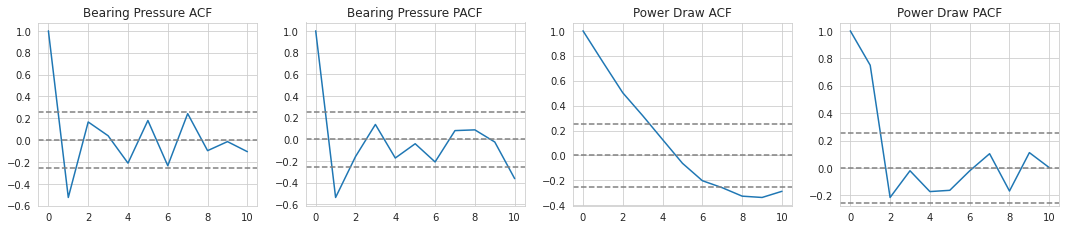

In [ ]:
# LET'S FOLLOW THE DICKEY-FULLER TEST RESULTS AND APPLY DIFFERENCING TO THE BEAR PRESSURE DATA TO MAKE IT STATIONARY
dataDiffBP = dataBP-dataBP.shift(1)
dataDiffBP = dataDiffBP.dropna()

#AUTOCORRELATION FUNCTION AND PARTIAL AUTOCORRELATION FUNCTION PLOTS
from statsmodels.graphics.tsaplots import acf, pacf


acfBP = acf(dataDiffBP, nlags=10)
pacfBP = pacf(dataDiffBP, nlags=10, method = 'ols') #ols - ordinary least squared

acfPD = acf(dataPD, nlags=10)
pacfPD = pacf(dataPD, nlags=10, method = 'ols')

plt.figure(figsize=(15,6))
plt.subplot(241)
plt.plot(acfBP)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataDiffBP)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataDiffBP)),linestyle='--',c='gray')
plt.title('Bearing Pressure ACF')
plt.subplot(242)
plt.plot(pacfBP)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataDiffBP)),linestyle='--',c='gray') #1.96 because it gives a 95% confidence interval (called Z-score)
plt.axhline(y=1.96/np.sqrt(len(dataDiffBP)),linestyle='--',c='gray') #within this confidence region (significance limits) the ACF can be considered zero
plt.title('Bearing Pressure PACF')

plt.subplot(243)
plt.plot(acfPD)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.title('Power Draw ACF')
plt.subplot(244)
plt.plot(pacfPD)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.title('Power Draw PACF')
plt.tight_layout()

## Use ARIMA(p,d,q) model

In [ ]:
#USE THE ARIMA MODEL WITH ORDERS p,d and q EVALUATED FROM PREVIOUS ACF AND PACF PLOTS
from statsmodels.tsa.arima_model import ARIMA

modelBP = ARIMA(dataBP, order=(1,1,1))
modelPD = ARIMA(dataPD, order=(2,0,4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


In [ ]:
# FITTING THE MODEL

modelBP_fit = modelBP.fit()
modelPD_fit = modelPD.fit()

#AKAIKE INFORMATION CRITERION RESULTS  (estimates the relative amount of information lost by the model, considering overfitting and undefitting risks)
print('Bearing Pressure', modelBP_fit.aic)
print('Power Draw', modelPD_fit.aic)

Bearing Pressure 573.2658397144231
Power Draw 13.660480465148481


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


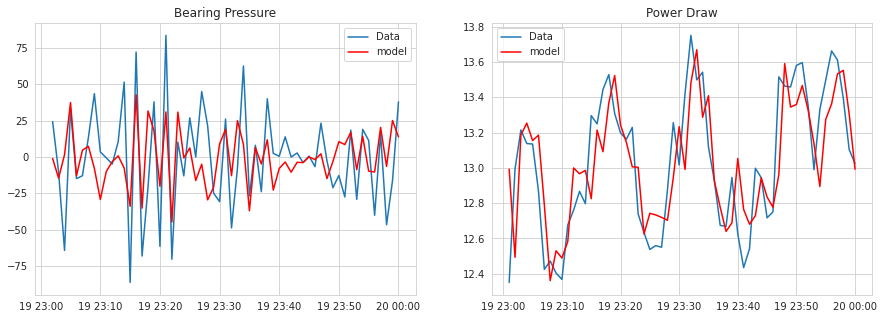

In [ ]:
# PLOT THE RESULTS

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dataDiffBP, label='Data')
plt.plot(modelBP_fit.fittedvalues, c='red', label='model')
plt.title('Bearing Pressure')
plt.legend()
plt.subplot(122)
plt.plot(dataPD, label='Data')
plt.plot(modelPD_fit.fittedvalues, c='red', label='model')
plt.title('Power Draw')
plt.legend()

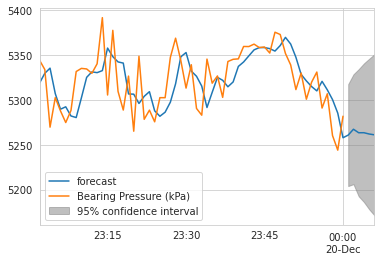

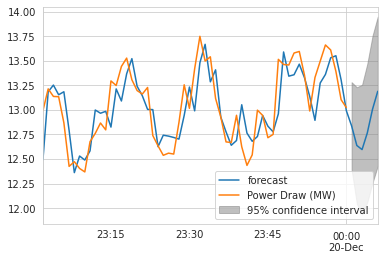

In [ ]:
# VISUALIZE THE PREDICTION FOR THE NEXT 5 MINUTES

PredictPlotBP = modelBP_fit.plot_predict(1,65)
PredictPlotPD = modelPD_fit.plot_predict(1,65)

## Compare with test data

In [ ]:
# FORECASTING THE NEXT 5 MINUTES AND COMPARE WITH THE FIRST 5 MINUTES OF THE TEST DATA

data_forecastBP = modelBP_fit.forecast(steps=5)[0]
data_forecastPD = modelPD_fit.forecast(steps=5)[0]

UseData_test = data_test.head(5)

print('Bearing Pressure (kPa) \n 5 min forecast :', data_forecastBP)
print(' First 5 min test data:',UseData_test['Bearing Pressure (kPa)'].values, '\n')

print('Power Draw (MW) \n 5 min forecast :', data_forecastPD)
print(' First 5 min test data :',UseData_test['Power Draw (MW)'].values)

Bearing Pressure (kPa) 
 5 min forecast : [5260.84717138 5267.38482015 5263.47033825 5263.51242841 5262.05678925]
 First 5 min test data: [5364.64978871 5343.77516293 5350.85819897 5361.13869352 5294.83475062] 

Power Draw (MW) 
 5 min forecast : [12.83777173 12.6378965  12.59639016 12.76519471 13.00703566]
 First 5 min test data : [12.7620036  12.49153287 12.2908877  12.78626847 13.01026878]


In [ ]:
# LOOK AT THE ERROR BETWEEN PREDICTION AND TEST DATA

from sklearn.metrics import mean_squared_error
import numpy as np

errorBP = np.sqrt(mean_squared_error(UseData_test['Bearing Pressure (kPa)'],data_forecastBP))
errorPD = np.sqrt(mean_squared_error(UseData_test['Power Draw (MW)'],data_forecastPD))

print('Bearing Pressure (kPa): \033[1m',errorBP,'\033[0m')
print('Power Draw (MW):\033[1m',errorPD,'\033[0m')

Bearing Pressure (kPa):  83.48938666361659 
Power Draw (MW): 0.15553098042681782 


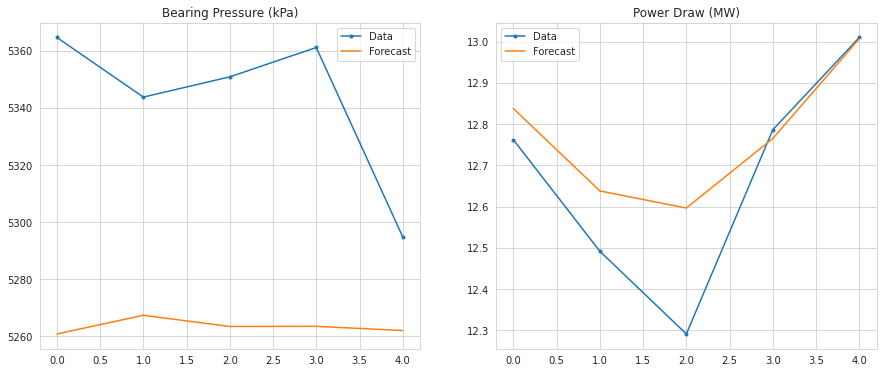

In [ ]:
# VISUALIZE THE DIFFERENCE BETWEEN FORECAST AND TEST DATA

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot(UseData_test['Bearing Pressure (kPa)'].values, label='Data', marker='.')
plot(data_forecastBP, label='Forecast')
plt.title('Bearing Pressure (kPa)')
plt.legend()
plt.subplot(1,2,2)
plot(UseData_test['Power Draw (MW)'].values, label='Data', marker='.')
plot(data_forecastPD, label='Forecast')
plt.title('Power Draw (MW)')
plt.legend()

## SECOND ATTEMPT: Assume original data is stationary

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


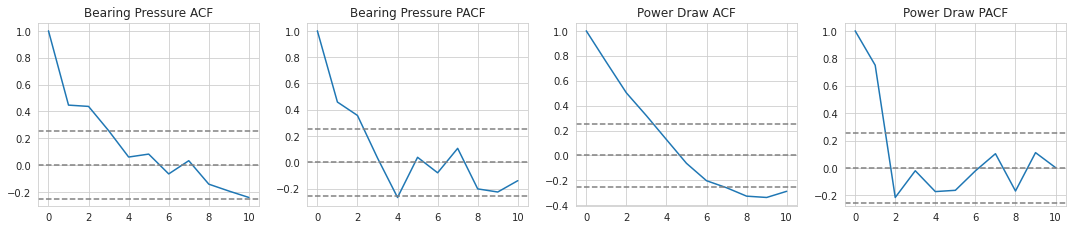

In [ ]:
#WE ASSUME BOTH SERIES ARE STATIONARY AND USE THE ORIGINAL BEARING PRESSURE SERIES INSTEAD OF THE DIFFERENCED ONE

#CHECK AGAIN THE ACF AND PACF, WITH THE ORIGINAL DATA

acfBP = acf(dataBP, nlags=10)
pacfBP = pacf(dataBP, nlags=10, method = 'ols')

acfPD = acf(dataPD, nlags=10)
pacfPD = pacf(dataPD, nlags=10, method = 'ols')

plt.figure(figsize=(15,6))
plt.subplot(241)
plt.plot(acfBP)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataBP)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataBP)),linestyle='--',c='gray')
plt.title('Bearing Pressure ACF')
plt.subplot(242)
plt.plot(pacfBP)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataBP)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataBP)),linestyle='--',c='gray')
plt.title('Bearing Pressure PACF')

plt.subplot(243)
plt.plot(acfPD)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.title('Power Draw ACF')
plt.subplot(244)
plt.plot(pacfPD)
plt.axhline(y=0, linestyle='--',c='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.axhline(y=1.96/np.sqrt(len(dataPD)),linestyle='--',c='gray')
plt.title('Power Draw PACF')
plt.tight_layout()

In [ ]:
# USE ARIMA MODEL AGAIN, with p, d AND q VALUES EVALUATED FROM ABOVE PLOTS
modelBP = ARIMA(dataBP, order=(2,0,3))
modelPD = ARIMA(dataPD, order=(2,0,4))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  % freq, ValueWarning)


In [ ]:
# FITTING THE MODEL

modelBP_fit = modelBP.fit()
modelPD_fit = modelPD.fit()

#AKAIKE INFORMATION CRITERION RESULTS
print('Bearing Pressure', modelBP_fit.aic)
print('Power Draw', modelPD_fit.aic)

Bearing Pressure 574.6585548988512
Power Draw 13.660480465148481


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


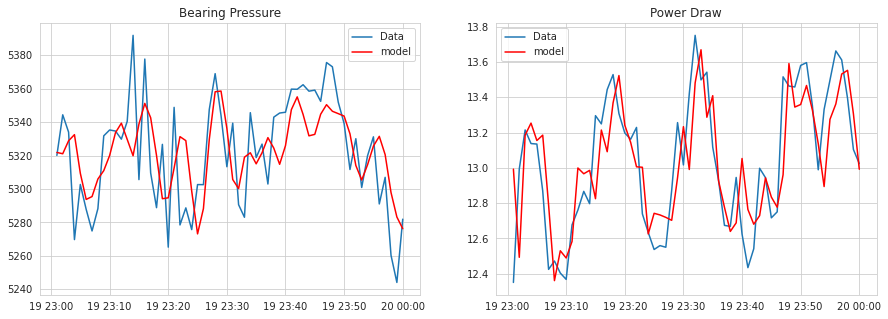

In [ ]:
# PLOT THE RESULTS

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(dataBP, label='Data')
plt.plot(modelBP_fit.fittedvalues, c='red', label='model')
plt.title('Bearing Pressure')
plt.legend()
plt.subplot(122)
plt.plot(dataPD, label='Data')
plt.plot(modelPD_fit.fittedvalues, c='red', label='model')
plt.title('Power Draw')
plt.legend()

In [ ]:
# FORECASTING THE NEXT 5 MINUTES AND COMPARE WITH THE FIRST 5 MINUTES OF THE TEST DATA

data_forecastBP = modelBP_fit.forecast(steps=5)[0]
data_forecastPD = modelPD_fit.forecast(steps=5)[0]

UseData_test = data_test.head(5)
print('Bearing Pressure (kPa) \n 5 min forecast :', data_forecastBP)
print(' First 5 min test data:',UseData_test['Bearing Pressure (kPa)'].values, '\n')

print('Power Draw (MW) \n 5 min forecast :', data_forecastPD)
print(' First 5 min test data :',UseData_test['Power Draw (MW)'].values)

Bearing Pressure (kPa) 
 5 min forecast : [5283.87775148 5310.57395721 5332.1287285  5335.8342508  5328.22096848]
 First 5 min test data: [5364.64978871 5343.77516293 5350.85819897 5361.13869352 5294.83475062] 

Power Draw (MW) 
 5 min forecast : [12.83777173 12.6378965  12.59639016 12.76519471 13.00703566]
 First 5 min test data : [12.7620036  12.49153287 12.2908877  12.78626847 13.01026878]


In [ ]:
# LOOK AT THE ERROR BETWEEN PREDICTION AND TEST DATA

from sklearn.metrics import mean_squared_error
import numpy as np

errorBP = np.sqrt(mean_squared_error(UseData_test['Bearing Pressure (kPa)'],data_forecastBP))
errorPD = np.sqrt(mean_squared_error(UseData_test['Power Draw (MW)'],data_forecastPD))

print('Bearing Pressure (kPa): \033[1m',errorBP,'\033[0m')
print('Power Draw (MW):\033[1m',errorPD,'\033[0m')

Bearing Pressure (kPa):  44.11845302879028 
Power Draw (MW): 0.15553098042681782 


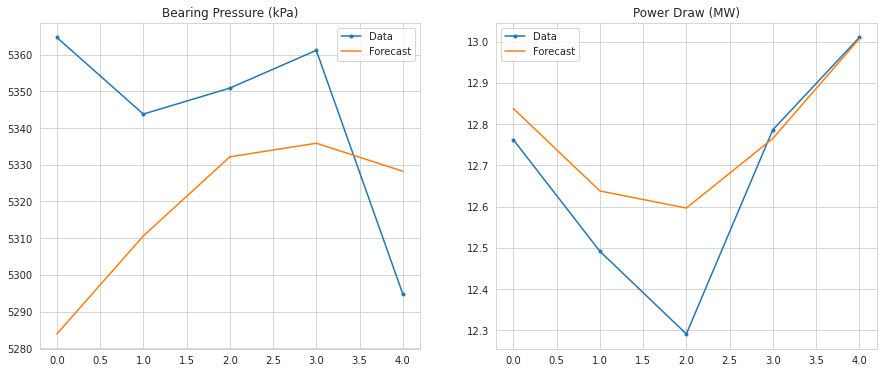

In [ ]:
# VISUALIZE THE DIFFERENCE BETWEEN FORECAST AND TEST DATA

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plot(UseData_test['Bearing Pressure (kPa)'].values, label='Data', marker='.')
plot(data_forecastBP, label='Forecast')
plt.title('Bearing Pressure (kPa)')
plt.legend()
plt.subplot(1,2,2)
plot(UseData_test['Power Draw (MW)'].values, label='Data', marker='.')
plot(data_forecastPD, label='Forecast')
plt.title('Power Draw (MW)')
plt.legend()